## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

Text(0.5, 1.0, 'Noise = 0.125')

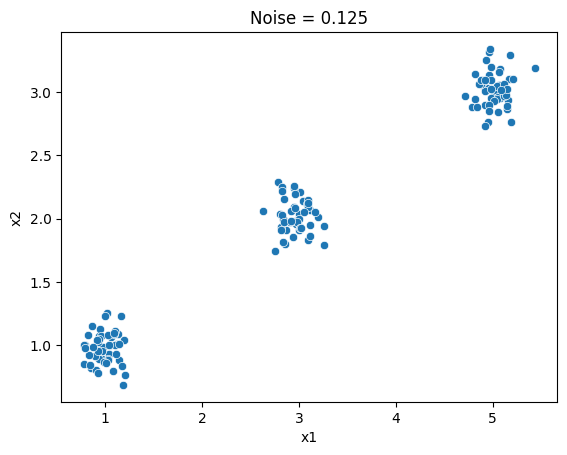

In [3]:
sns.scatterplot(x='x1',y='x2',data=df0_125).set_title('Noise = 0.125')

Text(0.5, 1.0, 'Noise = 0.25')

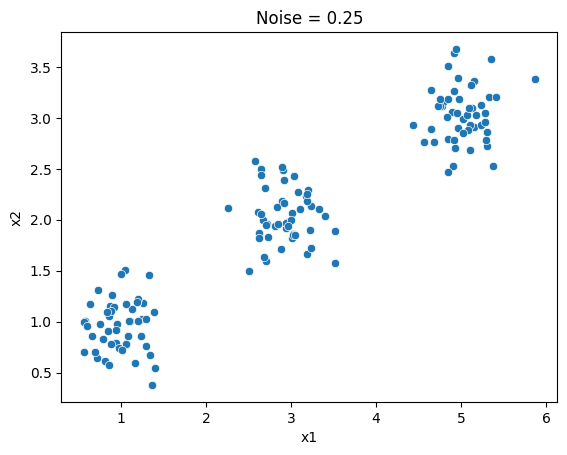

In [4]:
sns.scatterplot(x='x1',y='x2',data=df0_25).set_title('Noise = 0.25')

Text(0.5, 1.0, 'Noise = 0.5')

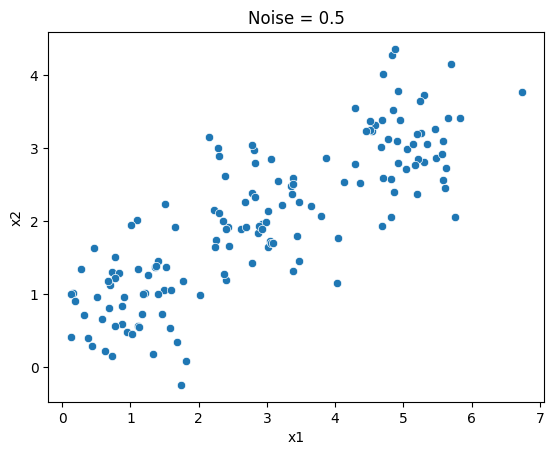

In [5]:
sns.scatterplot(x='x1',y='x2',data=df0_5).set_title('Noise = 0.5')

Text(0.5, 1.0, 'Noise = 1.0')

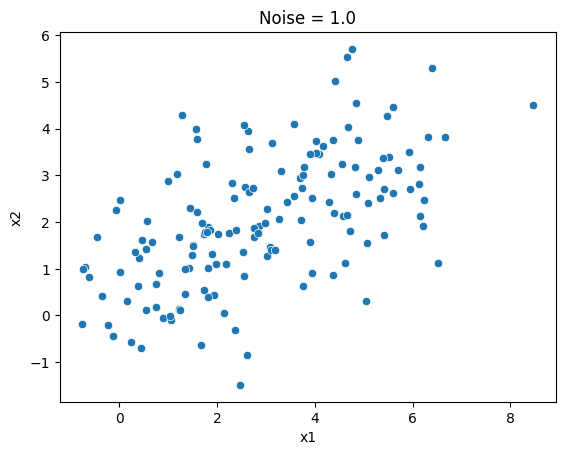

In [6]:
sns.scatterplot(x='x1',y='x2',data=df1_0).set_title('Noise = 1.0')

Text(0.5, 1.0, 'Noise = 2.0')

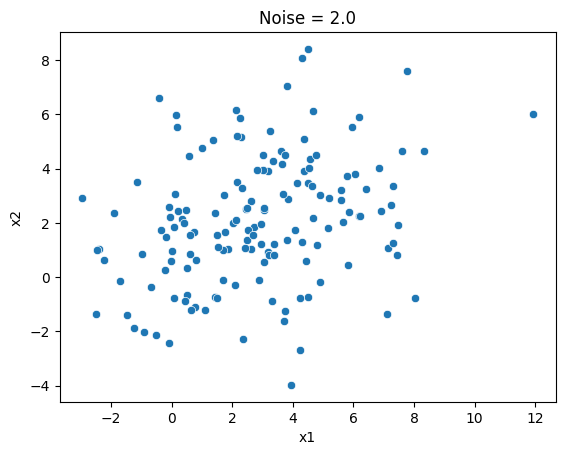

In [7]:
sns.scatterplot(x='x1',y='x2',data=df2_0).set_title('Noise = 2.0')

- As the noise gets bigger, the data shows less sign of clustering and they spread more generally.
- When the noise is small, we can see clearly there are 3 groups (eg. noise = 0.125 and noise = 0.25).
- When the noise is big, we can hardly see any pattern shown in the plot (eg. noise = 2.0).
- For noise = 0.5 and 1.0, there is no clustering shown, but we can see a moderate positive linear relationship between x1 and x2.
---

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

In [8]:
from sklearn.cluster import KMeans # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

def scree_plot(df): # Create a scree plot:
  X = df.iloc[:,[0,1]].apply(maxmin)
  k_bar = 10
  SSE = [] # We'll store the training error here
  for k in range(k_bar): # For indices from 0 to k_bar-1
      model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
      model = model.fit(X) # Fit the model
      SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector
  sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

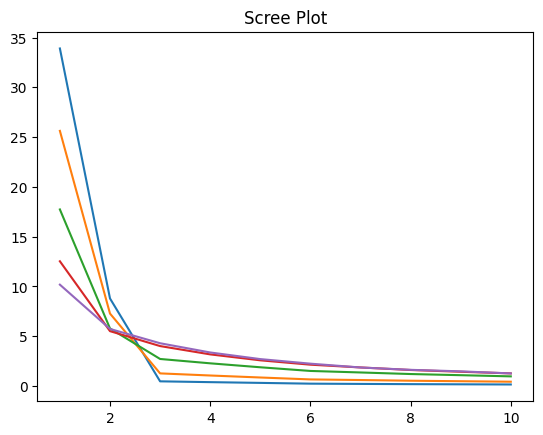

In [9]:
scree_plot(df0_125)
scree_plot(df0_25)
scree_plot(df0_5)
scree_plot(df1_0)
scree_plot(df2_0)

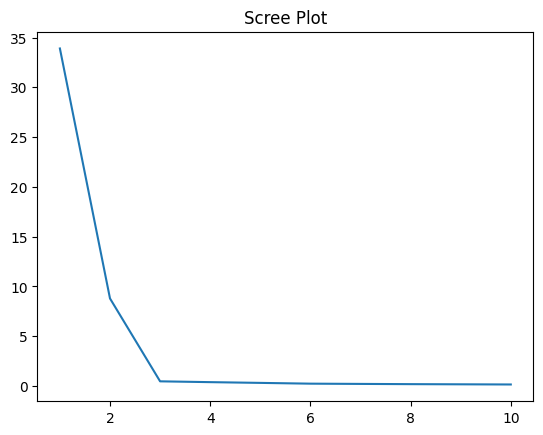

In [10]:
scree_plot(df0_125)

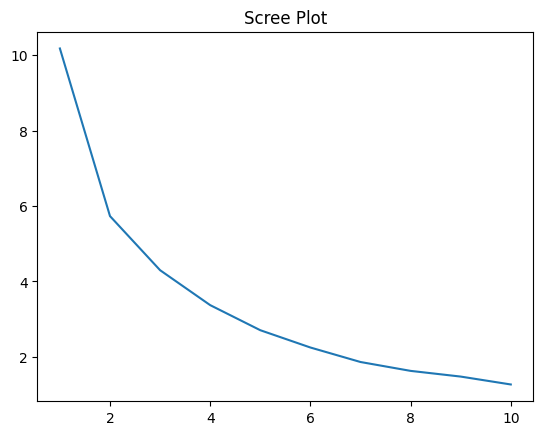

In [11]:
scree_plot(df2_0)

- When we hold k constant, the higher the noise, the smoother the Scree plot.
- Also, the SSE of the start point for the scree plot gets lower as noise increases.
---

4. Explain the intuition of the elbow, using this numerical simulation as an example.

- The elbow in the scree plot shows the best choice of k (number of groups) which has the lowest SSE while not relatively large.
- From the simulation we had previously, it shows that the noise of the data could also affect our choice of best k as it seems to averaging out the SSE among the choice of k, make elbows smooth and hard to determine.
---

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?

In [12]:
data = pd.read_csv("https://raw.githubusercontent.com/xec9cp/clustering_assignment/refs/heads/main/data/2022%20election%20cycle%20fundraising.csv")
data.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [13]:
data["Raised"] = data["Raised"].str.replace('$', '').str.replace(',', '').astype('float')
data["Spent"] = data["Spent"].str.replace('$', '').str.replace(',', '').astype('float')
data["Cash on Hand"] = data["Cash on Hand"].str.replace('$', '').str.replace(',', '').astype('float')
data["Debts"] = data["Debts"].str.replace('$', '').str.replace(',', '').astype('float')
df = data.iloc[:, 1:]
df.head()

,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0
1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0
4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0


2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.

In [14]:
RS = pd.DataFrame()
RS['Raised'] = maxmin(df["Raised"])
RS['Spent'] = maxmin(df["Spent"])

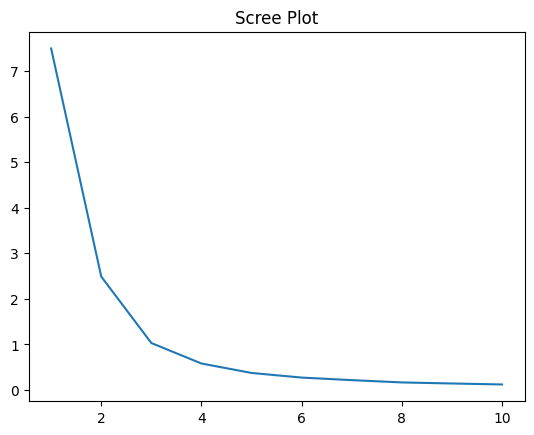

In [15]:
# scree plot
scree_plot(RS) #so k* = 3

<Axes: xlabel='Spent', ylabel='Raised'>

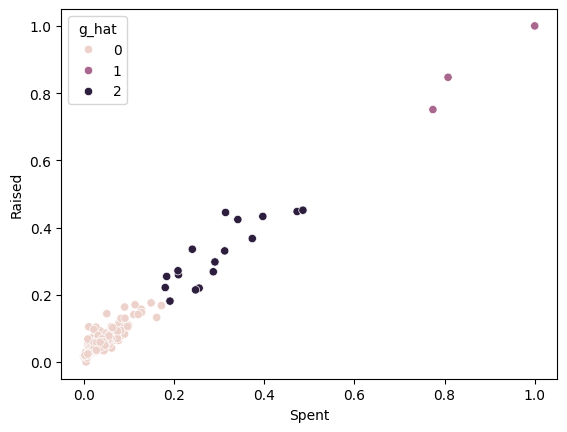

In [16]:
model = KMeans(n_clusters=3,random_state=0) # Pass centroids and options into the model
model = model.fit(RS) # Initialize a kmc model
df['g_hat'] = model.predict(RS) # Predict values

# scatter plot
sns.scatterplot(y = RS['Raised'], x = RS['Spent'], hue = df['g_hat'])

In [17]:
# Look at cluster sizes
print(df["g_hat"].value_counts().sort_index())

df.loc[df.g_hat==1]

g_hat
0    517
1      3
2     17
Name: count, dtype: int64


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat
340,Mark Kelly,Democratic,Arizona,Senate,73140886.0,61357281.0,13186127.0,0.0,1
417,Raphael Warnock,Democratic,Georgia,Senate,86581469.0,75959810.0,22762985.0,0.0,1
523,Val Demings,Democratic,Florida,House,64682883.0,58806664.0,6647641.0,0.0,1


In [18]:
df.loc[df.g_hat==2]

,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,2
87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811.0,35928936.0,5089745.0,0.0,2
89,Chuck Schumer,Democratic,New York,Senate,35899966.0,25944350.0,20231213.0,0.0,2
115,Dan Crenshaw,Republican,Texas,House,14535870.0,14512435.0,1876149.0,0.0,2
261,John Kennedy,Republican,Louisiana,Senate,28119082.0,18276565.0,15530074.0,0.0,2
290,Katie Porter,Democratic,California,House,21441693.0,15946876.0,15762568.0,0.0,2
298,Kevin McCarthy,Republican,California,House,24791538.0,22086344.0,7507326.0,0.0,2
326,Maggie Hassan,Democratic,New Hampshire,Senate,30914830.0,28380992.0,4813508.0,0.0,2
328,Marco Rubio,Republican,Florida,Senate,36709285.0,30153111.0,9631856.0,0.0,2
357,Michael Bennet,Democratic,Colorado,Senate,18086343.0,13713611.0,4898614.0,374819.0,2


- There is a positive linear relationship shown in the scatter plot.
- Democratic and Republican politicians comprises the smallest two cluster groups.
- Only three Demographic politicians comprises the $\hat{g} = 1$ cluster, which is the high-spent high-raised group.

---

3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.

In [19]:
CD = pd.DataFrame()
CD['Cash on Hand'] = maxmin(df["Cash on Hand"])
CD['Debts'] = maxmin(df["Debts"])

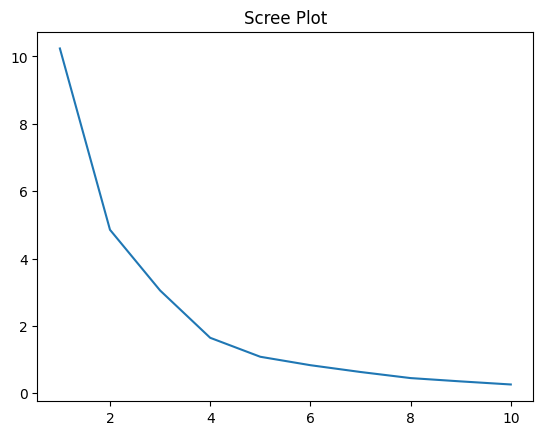

In [20]:
# scree plot
scree_plot(CD) #so k* = 4

<Axes: xlabel='Cash on Hand', ylabel='Debts'>

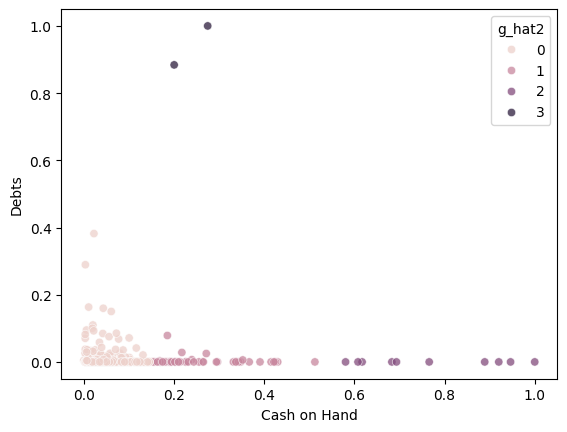

In [21]:
model2 = KMeans(n_clusters=4,random_state=0) # Pass centroids and options into the model
model2 = model2.fit(CD) # Initialize a kmc model
df['g_hat2'] = model2.predict(CD) # Predict values

# scatter plot
sns.scatterplot(y = CD['Debts'], x = CD['Cash on Hand'], hue = df['g_hat2'], alpha = 0.75)

In [22]:
# Look at cluster sizes
print(df["g_hat2"].value_counts().sort_index())

df.loc[df.g_hat2==3]

g_hat2
0    476
1     49
2     10
3      2
Name: count, dtype: int64


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat,g_hat2
133,David Trone,Democratic,Maryland,House,12990741.0,6878050.0,6206371.0,13302000.0,0,3
442,Ron Johnson,Republican,Wisconsin,Senate,27680901.0,23731653.0,4508581.0,11759857.0,2,3


In [23]:
df.loc[df.g_hat2==2]

,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat,g_hat2
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,2,2
89,Chuck Schumer,Democratic,New York,Senate,35899966.0,25944350.0,20231213.0,0.0,2,2
261,John Kennedy,Republican,Louisiana,Senate,28119082.0,18276565.0,15530074.0,0.0,2,2
267,John Thune,Republican,South Dakota,Senate,6770674.0,2763217.0,17419927.0,0.0,0,2
274,Josh Gottheimer,Democratic,New Jersey,House,7720264.0,2045198.0,14024163.0,0.0,0,2
290,Katie Porter,Democratic,California,House,21441693.0,15946876.0,15762568.0,0.0,2,2
310,Lindsey Graham,Republican,South Carolina,Senate,6695582.0,5371524.0,13815515.0,0.0,0,2
340,Mark Kelly,Democratic,Arizona,Senate,73140886.0,61357281.0,13186127.0,0.0,1,2
417,Raphael Warnock,Democratic,Georgia,Senate,86581469.0,75959810.0,22762985.0,0.0,1,2
500,Tim Scott,Republican,South Carolina,Senate,37743256.0,23876921.0,21539824.0,0.0,2,2


- The data spread from lowest to highest for Cash on Hand variable; most politicians have there debts below median level.
- The more cash on hand, less the debts.
- Democratic and Republican politicians comprises the smallest two clusters.
- Only one Democratic and one Republican politician comprises the cluster $\hat{g} = 3$ with their around 20 percentile cash on hand status and maximum debts taken.
  *   By looking up the politician in the data set, we find that they are David Trone	when running for House in Maryland, and Ron Johnson when running for Senate in Wisconsin.
- The k* is one more than the optimal k from previous part. This might because of the two outliers we mentioned, the cluster $\hat{g} = 3$.
---

4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?

In [24]:
df4 = df.loc[:,['Spent', 'Raised', 'Cash on Hand', 'Debts']]
df4 = df4.apply(maxmin) #apply minmax normalization
df4.head()

,Spent,Raised,Cash on Hand,Debts
0,0.098074,0.103512,0.040154,0.0
1,0.016371,0.040686,0.111166,0.0
2,0.183753,0.254404,0.920268,0.0
3,0.015449,0.029527,0.030150,0.0
4,0.021915,0.034148,0.050962,0.0


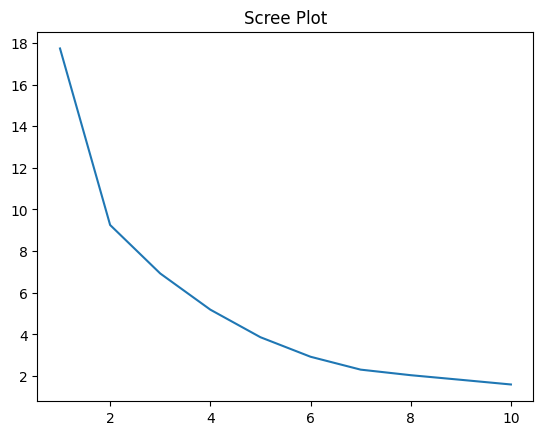

In [25]:
#scree plot
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(df4) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

In [26]:
chosen_k = 2
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
df4["cluster_all"] = kmeans.fit_predict(df4)

# Look at cluster sizes
print(df4["cluster_all"].value_counts().sort_index())

cluster_all
0    514
1     23
Name: count, dtype: int64


<Axes: xlabel='Spent', ylabel='Raised'>

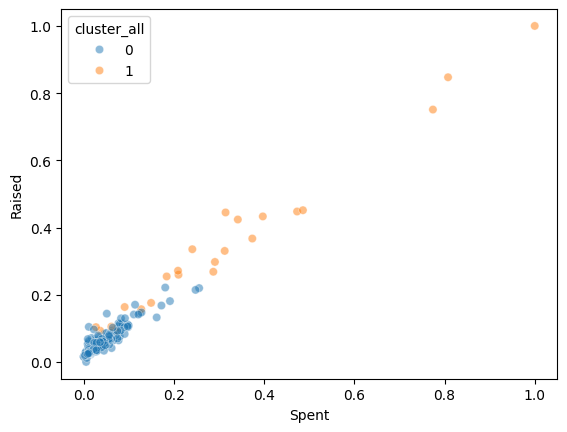

In [27]:
# scatter plot for spent & raised
sns.scatterplot(data = df4, y = 'Raised', x = 'Spent', hue = 'cluster_all', alpha = 0.5)

<Axes: xlabel='Cash on Hand', ylabel='Debts'>

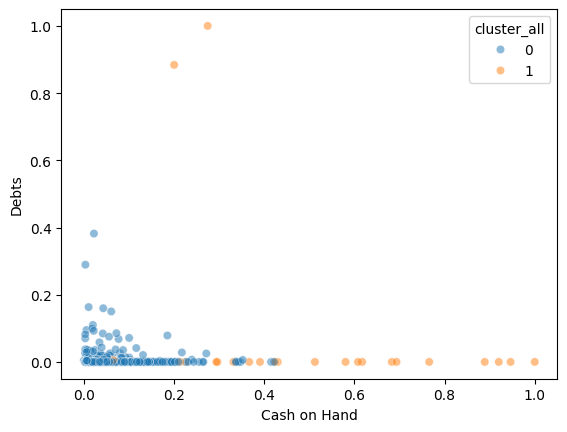

In [28]:
# scatter plot for debts & cash on hand
sns.scatterplot(data = df4, y = 'Debts', x = 'Cash on Hand', hue = 'cluster_all', alpha = 0.5)

- Using 4 numeric variables makes our scree plot smoother and our k* drops to 2.
- For previous two parts, our final scatter plot turns out to have clear clusters grouped up, but the 4-variable k-MC algorithm groups some datapoints that visually seems to be in $\hat{g}=0$ in the the $\hat{g}=1$ cluster.
---

5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

- Most politicians spend and raise less money, especially for the Independent politicians.
- Only 3 demographic politicians did a high-spending-high-raising strategy on fundraising, and they don't have any debt taken.
- Most politicians don't take debts, no matter how many money they have on hand.
- If we take all 4 factors (Spent, Raised, Cash on Hand, Debts) into account, we could classify the politicians into 2 categories. One group tend to play safe and have lower money flow in the fundraising (so all 4 variables are low); this might because they don't have the capacity (e.g. Independent politicians), or they prefer with the strategy. The other group tend to go wild and have either 1) more cash on hands through raising for spending; or 2) more debt taken for heavy spending.
---

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?